# Load Data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('preprocessed.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Link,Date,Gender,Age,Lead Follow,Membership,Climb Type,Best Times,...,Trad Leads,Trad Follows,Mixed Leads,Mixed Follows,Aid Leads,Aid Follows,Ice Leads,Ice Follows,Boulder,month_year
0,0,Aidan Shelburne,https://www.mountainproject.com/user/200717675...,2021-03-08,Male,21.0,"Sport: leads 5.11a, follows 5.11d\nBoulders: V7",2020,"Sport, TR, Gym",Weekday afternoons/Weekends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7,2021-03
1,1,Aidan Shelburne,https://www.mountainproject.com/user/200717675...,2021-03-06,Male,21.0,"Sport: leads 5.11a, follows 5.11d\nBoulders: V7",2020,"Sport, TR, Gym",Weekday afternoons/Weekends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7,2021-03
2,2,Aidan Shelburne,https://www.mountainproject.com/user/200717675...,2021-03-06,Male,21.0,"Sport: leads 5.11a, follows 5.11d\nBoulders: V7",2020,"Sport, TR, Gym",Weekday afternoons/Weekends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7,2021-03
3,3,Aidan Shelburne,https://www.mountainproject.com/user/200717675...,2021-03-06,Male,21.0,"Sport: leads 5.11a, follows 5.11d\nBoulders: V7",2020,"Sport, TR, Gym",Weekday afternoons/Weekends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7,2021-03
4,4,Aidan Shelburne,https://www.mountainproject.com/user/200717675...,2021-01-16,Male,21.0,"Sport: leads 5.11a, follows 5.11d\nBoulders: V7",2020,"Sport, TR, Gym",Weekday afternoons/Weekends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7,2021-01


# Gender Distribution

In [6]:
df.Gender.value_counts()

Male           436021
Female          77710
Unknown          1135
Genderqueer        55
Name: Gender, dtype: int64

# Age Distribution

In [17]:
print('Null values: ', df['Age'].isnull().sum())

Null values:  829


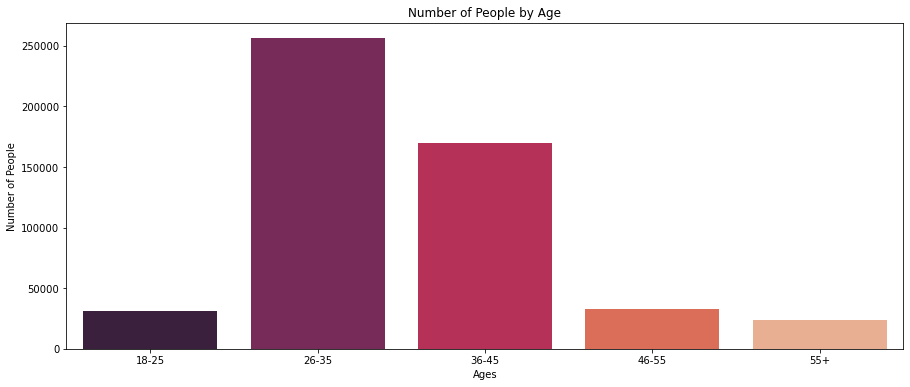

In [16]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of People by Age")
plt.xlabel("Ages")
plt.ylabel("Number of People")
plt.show()

# Only Sport Climbs

In [18]:
df_sport = df[df['Route Type'] == 'Sport']

In [19]:
df_sport.shape

(224163, 33)

In [21]:
df_sport.columns

Index(['Unnamed: 0', 'Name', 'Link', 'Date', 'Gender', 'Age', 'Lead Follow',
       'Membership', 'Climb Type', 'Best Times', 'Other Interests', 'Rating',
       'Route Type', 'Style', 'Lead Style', 'URL', 'Pitches', 'Location',
       'Avg Stars', 'Your Stars', 'Your Rating', 'Sport Leads',
       'Sport Follows', 'Trad Leads', 'Trad Follows', 'Mixed Leads',
       'Mixed Follows', 'Aid Leads', 'Aid Follows', 'Ice Leads', 'Ice Follows',
       'Boulder', 'month_year'],
      dtype='object')

In [22]:
df_sport = df_sport[['Name', 'Date', 'month_year', 'Gender', 'Age', 'Rating', 'Style', 'Lead Style', 'Pitches']]

In [23]:
df_sport.head()

,Name,Date,month_year,Gender,Age,Rating,Style,Lead Style,Pitches
36,Aidan Shelburne,2020-12-19,2020-12,Male,21.0,5.11b,TR,NaN,1.0
120,Aidan Shelburne,2020-08-06,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0
121,Aidan Shelburne,2020-08-06,2020-08,Male,21.0,5.10a,Lead,NaN,1.0
122,Aidan Shelburne,2020-08-06,2020-08,Male,21.0,5.10,Lead,NaN,1.0
123,Aidan Shelburne,2020-08-06,2020-08,Male,21.0,5.10,Lead,NaN,1.0


## Turn Sport Rating into Numerical Formal

In [24]:
df_sport['Rating'].unique()

array(['5.11b', '5.11a', '5.10a', '5.10', '5.10b', '5.9', '5.9+',
       '5.11b/c', '5.13c', '5.12c/d', '5.11c/d', '5.12a', '5.10a/b',
       '5.13a', '5.12c', '5.11c', '5.12d', '5.10d', '5.12b', '5.10c',
       '5.11d', '5.11-', '5.12b/c', '5.11+', '5.8', '5.11a/b', '5.11',
       '5.7+', '5.10b/c', '5.7', '5.12a/b', '5.12c PG13', '5.3', '5.9-',
       '5.10-', '5.5', '5.2', '5.10c/d', '5.4', '5.13+ R', '5.12-',
       '5.13b', '5.6', '5.8+', '5.10+', '5.4 PG13', '5.8-', '5.10a PG13',
       '5.12', '5.10c R', '5.10 PG13', '5.10d PG13', '5.11a PG13',
       '5.7 R', '5.7+ PG13', '5.8 PG13', '5.9- PG13', '5.8+ PG13',
       '5.13-', '5.10b PG13', '5.9+ PG13', '4th', '5.7 PG13', '5.6 R',
       '5.13', '5.14a', '5.13a/b', '5.12+', '5.9 PG13', '5.10c PG13',
       '5.10- PG13', '5.10b/c R', '5.6 PG13', '5.8 R', '5.10b R',
       '5.10b/c PG13', '5.13d', '5.13b/c', '5.9 R', '5.9+ R', '5.10d R',
       '5.8+ R', '5.11a R', '5.11c R', '5.11a/b PG13', '5.10a R',
       '5.12b PG13', '5.11b P